In [1]:
%load_ext autoreload
%autoreload 2
%load_ext Cython

from __future__ import division
from __future__ import print_function

import sys,time,datetime,copy,subprocess,itertools,pickle,warnings,json,gc,numbers

import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl


In [2]:
import Hawkes as hk

para = {"mu":0.1, "alpha":0.5, "beta":10.0}
itv = [0,10000]

h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('exp').set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

1904
mu     0    0.096359
alpha  0    0.494123
beta   0    9.729147
dtype: float64

6.55 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [3]:
import Hawkes as hk

para = {"mu":0.1, "alpha":[0.25,0.25], "beta":[1.0,20.0]}
itv = [0,10000]

h1 = hk.simulator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

2043
mu     0     0.098239
alpha  0     0.245775
       1     0.273370
beta   0     0.897017
       1    20.121738
dtype: float64

13.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [4]:
import Hawkes as hk

para = {"mu":0.1, "k":0.5,"p":2.0,"c":1.0}
itv = [0,10000]

h1 = hk.simulator().set_kernel('pow').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('pow').set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

2133
mu  0    0.108735
k   0    0.807281
p   0    2.259248
c   0    1.237152
dtype: float64

934 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1308
mu     0    11.369640
       1    20.463742
       2    18.915729
       3     3.050564
       4     0.464492
       5     7.693035
alpha  0     0.198308
beta   0    21.437806
dtype: float64
mu     0     4.533610
       1    -1.022362
       2     7.278812
       3    -1.489394
       4    -1.033024
       5    13.291154
alpha  0     0.210327
beta   0    19.397417
dtype: float64


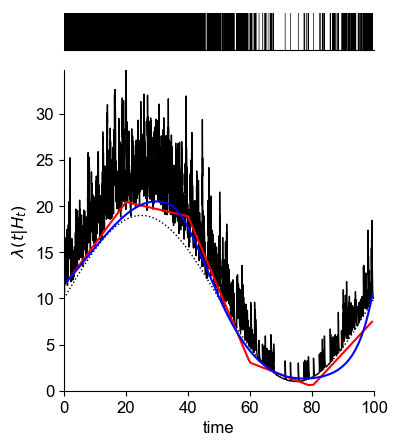

In [5]:
import Hawkes as hk

para = {"alpha":0.2,"beta":10.0}
mu_t = lambda x: 10.0 + 9.0*np.sin(2*np.pi*x/100)
itv = [0,100]
h1 = hk.simulator().set_kernel("exp").set_baseline('custom',l_custom=mu_t).set_parameter(para)
T = h1.simulate(itv)
print(len(T))

# piecewise lienar model
h2 = hk.estimator().set_kernel("exp").set_baseline('plinear',num_basis=6)
h2.fit(T,itv)
print(h2.para)

# log-linear model
h3 = hk.estimator().set_kernel("exp").set_baseline('loglinear',num_basis=6)
h3.fit(T,itv)
print(h3.para)

h1.plot_l()
plt.plot(T,h2.baseline.l(T),"r-")
plt.plot(T,h3.baseline.l(T),"b-")
pass